In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
import phate

In [3]:
os.chdir('..')
import manifold_methods
import plotting
import mappings
import data_loader

In [4]:
exp_path = '/lustre06/project/6065672/shared/DietNet/1KGB_POP24/1KGP/WGS30X_V1/oldnow/MattsPlace'
fname = '1000G.2504_WGS30x.GSA17k_MHI.intersectGSA.miss10perc.maf0.05.pruned.autosomes.noHLA.phased_imputed_V1.hdf5'

In [5]:
inputs, class_labels, samples, snp_names, class_label_names = data_loader.load_data_1000G(os.path.join(exp_path, fname))
label_with_names, label_with_superpop_names = data_loader.preprocess_labels_1000G(class_labels, class_label_names)

In [7]:
idx_to_use = label_with_superpop_names != 'AMR'

label_with_superpop_names = label_with_superpop_names[idx_to_use]
inputs = inputs[idx_to_use]  
samples = samples[idx_to_use] 
label_with_names = np.array(label_with_names)[idx_to_use]

In [8]:
pca_obj = sklearn.decomposition.PCA(n_components=100, random_state=42)
pca_input = pca_obj.fit_transform(inputs)

## 1000G

In [21]:
mappings.label_order_1000G_coarse.remove('AMR')
for pop in ['PEL', 'MXL', 'PUR', 'CLM']:
    mappings.label_order_1000G_fine.remove(pop)

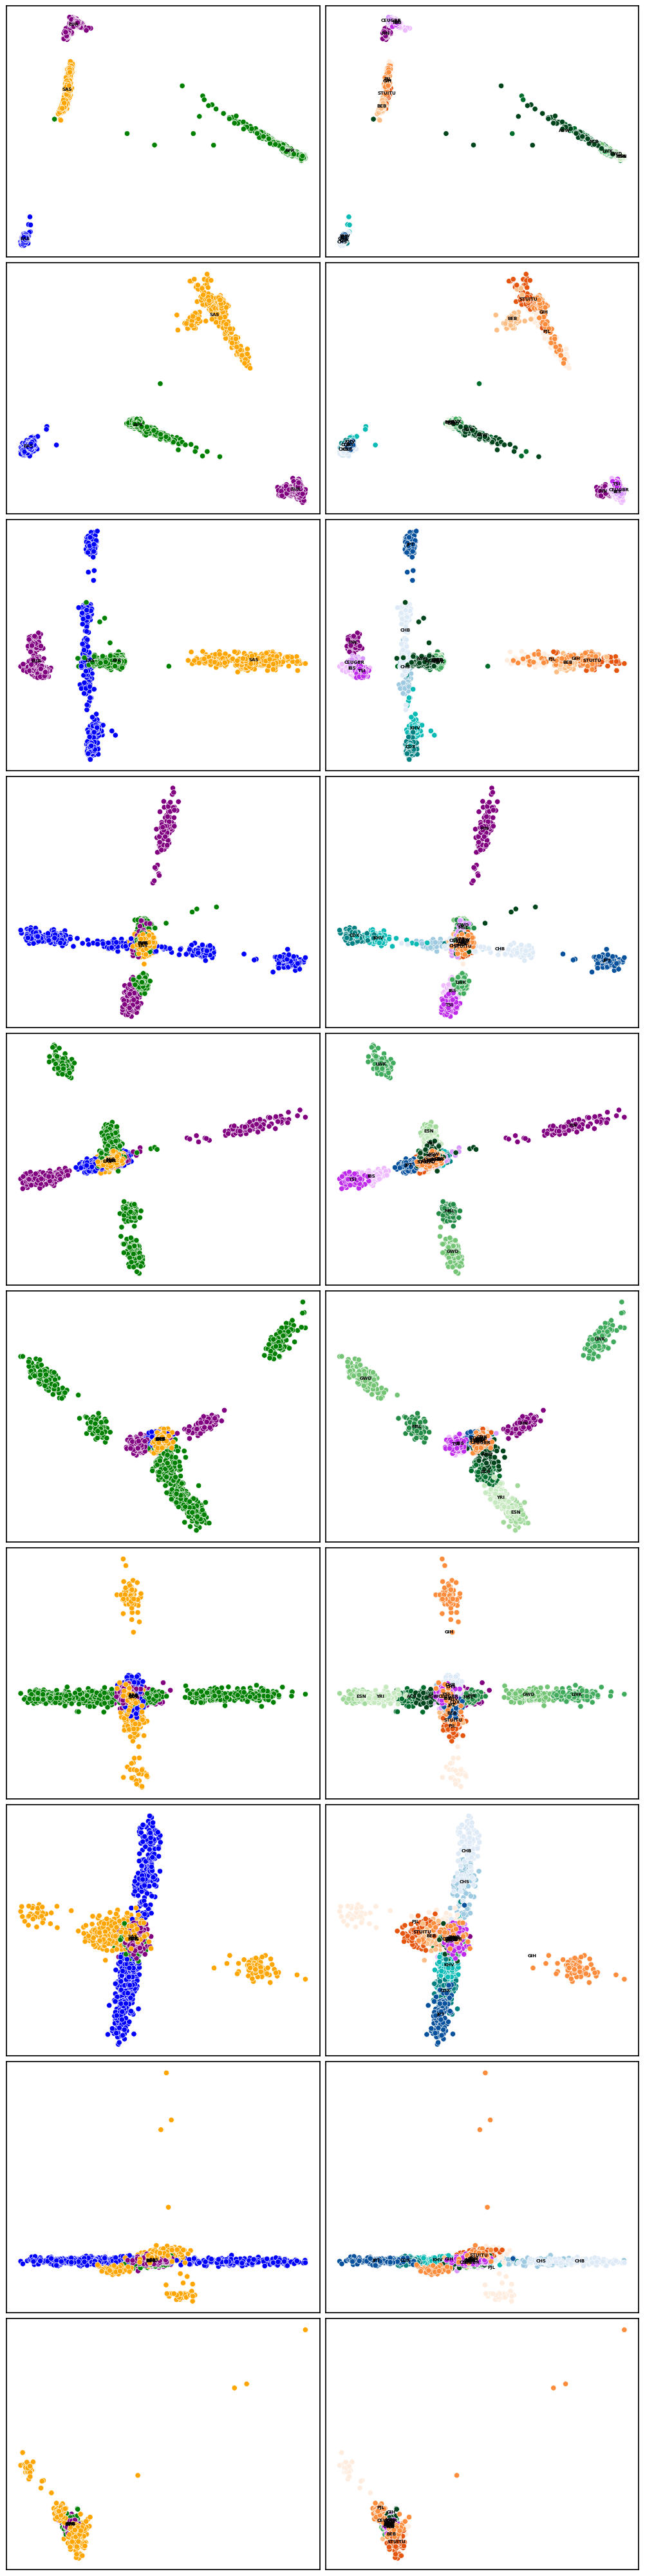

In [22]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(10,40))

for comp in range(10):
    # initial 2D phate embedding
    plotting.plot_embeddings(pca_input[:,comp:(comp+2)], 
                             label_with_superpop_names, 
                             None,
                             mappings.pop_pallette_1000G_coarse,
                             mappings.label_order_1000G_coarse,
                             True,
                             ax[comp, 0])
    plotting.plot_embeddings(pca_input[:,comp:(comp+2)], 
                             label_with_names,
                             None,
                             mappings.pop_pallette_1000G_fine,
                             mappings.label_order_1000G_fine,
                             True,
                             ax[comp, 1])
plt.tight_layout()

In [23]:
phate_operator = phate.PHATE(random_state=42, n_pca=None)
phate_operator.fit(pca_input)
phate_emb = phate_operator.transform()

Running PHATE on 1975 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.23 seconds.
  Calculating affinities...
  Calculated affinities in 0.21 seconds.
Calculated graph and diffusion operator in 0.44 seconds.
Calculating optimal t...
  Automatically selected t = 11
Calculated optimal t in 3.19 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.64 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.15 seconds.


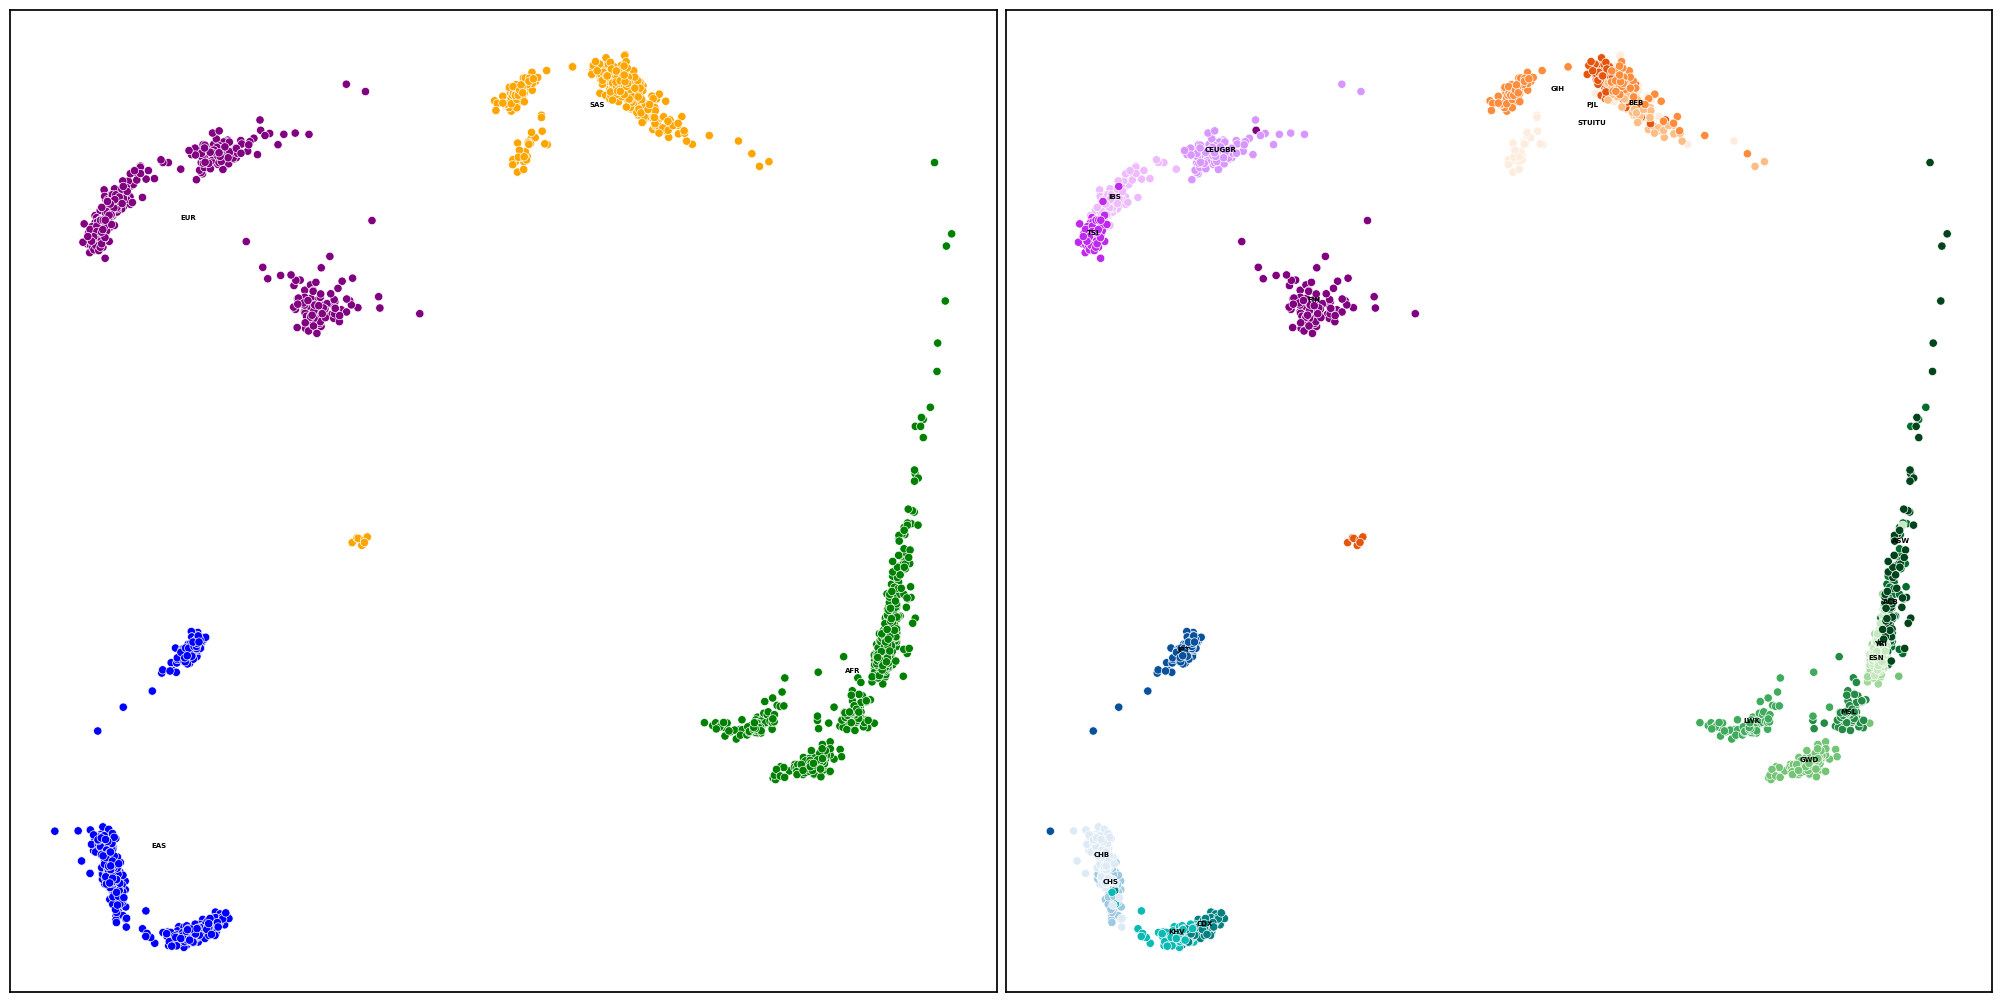

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plotting.plot_embeddings(phate_emb, 
                         label_with_superpop_names, 
                         None,
                         mappings.pop_pallette_1000G_coarse,
                         mappings.label_order_1000G_coarse,
                         True,
                         ax[0])
plotting.plot_embeddings(phate_emb, 
                         label_with_names,
                         None,
                         mappings.pop_pallette_1000G_fine,
                         mappings.label_order_1000G_fine,
                         True,
                         ax[1])
plt.tight_layout()